In [1]:
import cv2
from skimage.transform import resize
from os import listdir, walk
from os.path import isfile, join
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K

def gray_reshape(directory, new_size = (28,28), gray =True):
    """
    give the list of photos with the correct pixel size you want to 
    downsize. If you want Gray then write True.
    """
    items_resized  =[]
    pictures = []
    labels = []
    mapping = {'plants' : 0,'coins' : 1,'faces' : 2,'cups' : 3,'glasses' : 4,'pens' : 5,'gestures' : 6,'cutlery' : 7,'plates' : 8, 
                'nail_polishes' : 9  ,'shoes' : 10 
                }
    onlyfolders = [f for f in listdir(directory)]
    for idx, folder in enumerate(onlyfolders[1:]):
        pictures = [f for f in listdir(directory + folder) if isfile(join(directory + folder , f))]
        for idx, picture in enumerate(pictures):
            item = cv2.imread(directory + folder +'/'+ picture )
            labels.append(mapping[folder])
            
            if gray == True:
                item_gray = cv2.cvtColor(item, cv2.COLOR_BGR2GRAY)
                item_resized_gray = resize(item_gray, new_size)
                items_resized.append(item_resized_gray)
            else:
                item_resized_colored = resize(item, new_size)
                items_resized.append(item_resized_colored)
    return items_resized, labels

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

No supported GPU was found.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
onlyfolders = [f for f in listdir('../output/')]
onlyfolders

['.DS_Store',
 'plants',
 'coins',
 'glasses',
 'pens',
 'gestures',
 'cutlery',
 'plates',
 'nail_polishes',
 'shoes',
 'cups',
 'faces']

In [3]:
X , y = gray_reshape('../output/', new_size = (160,160), gray =True);

#plt.imshow(X[8],cmap='Greys')
# Model / data parameters
num_classes = len(np.unique(y))
input_shape = (160, 160, 1)
# shuffle the data

shuffler = np.random.permutation(len(X))
X = np.array(X)
y = np.array(y)
X = X[shuffler]
y = y[shuffler]



In [4]:
# the data, split between train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
# Scale images to the [0, 1] range
#### Normalise


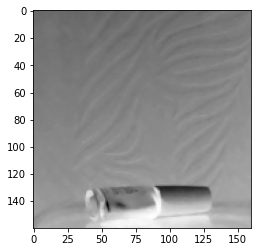

In [5]:
plt.imshow(X[8],cmap='Greys')

In [6]:
# Always always check shapes! 
X_train.shape, X_test.shape

((1042, 160, 160), (184, 160, 160))

In [7]:
x_train = X_train.astype("float32") / 255
x_test = X_test.astype("float32") / 255

# one hot encoder

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)



In [8]:
# define the keras model.    the kernel size is the window that checks geometries: can be (3,3), (5,5), (7,7)
# Always clear the session!
K.clear_session()
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),   # number of neurons:  must be multiples of 2. good technique to start eith 8 and then we increase in the insede layers.
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
# model summary table
model.summary()

# define the batch size and number of epochs
batch_size = 5
epochs = 100




2022-05-12 01:40:37.061487: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23104)             0         
                                                                 
 dropout (Dropout)           (None, 23104)             0

In [180]:
# complile and define eval metric
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [181]:
# fit the model
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=3)
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
188/188 [==============================] - 14s 72ms/step - loss: 2.3187 - accuracy: 0.1996 - val_loss: 2.2916 - val_accuracy: 0.1905
Epoch 2/100
188/188 [==============================] - 14s 73ms/step - loss: 2.2910 - accuracy: 0.2028 - val_loss: 2.2809 - val_accuracy: 0.1905
Epoch 3/100
188/188 [==============================] - 13s 68ms/step - loss: 2.2848 - accuracy: 0.2028 - val_loss: 2.2672 - val_accuracy: 0.1905
Epoch 4/100
188/188 [==============================] - 12s 64ms/step - loss: 2.2521 - accuracy: 0.2028 - val_loss: 2.2315 - val_accuracy: 0.1905
Epoch 5/100
188/188 [==============================] - 10s 51ms/step - loss: 2.1888 - accuracy: 0.2049 - val_loss: 2.1080 - val_accuracy: 0.1905
Epoch 6/100
188/188 [==============================] - 10s 52ms/step - loss: 1.9962 - accuracy: 0.2924 - val_loss: 1.8508 - val_accuracy: 0.3048
Epoch 7/100
188/188 [==============================] - 8s 45ms/step - loss: 1.6787 - accuracy: 0.4301 - val_loss: 1.7309 - val_acc

In [182]:
model.save("model_MNIST.h5")
# here you can stop your notebook
# moons_model = load_model("model_MNIST.h5")
# moons_model.summary()

In [10]:
# Load model if needed
from tensorflow.keras.models import load_model
model = load_model("model_MNIST.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 8)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23104)             0         
                                                                 
 dropout (Dropout)           (None, 23104)             0

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2865249514579773
Test accuracy: 0.945652186870575


In [12]:
mapping = {'plants' : 0,'coins' : 1,'faces' : 2,'cups' : 3,'glasses' : 4,'pens' : 5,'gestures' : 6,'cutlery' : 7,'plates' : 8, 
             'nail_polishes' : 9  ,'shoes' : 10 
             }
ynew = model.predict(x_test)
# show the inputs and predicted outputs
for idx, value in enumerate(ynew):
    print(f'With {np.max(value)} probability the model predicts that it is a {list(mapping)[np.where(value == np.max(value))[0][0]]}.')#
    print(f'The item is {list(mapping)[np.where(y_test[idx] == np.max(y_test[idx]))[0][0]]}.')
    


With 0.9945072531700134 probability the model predicts that it is a plants.
The item is plants.
With 0.792144775390625 probability the model predicts that it is a plants.
The item is plants.
With 0.9775363802909851 probability the model predicts that it is a cutlery.
The item is cutlery.
With 0.9996623992919922 probability the model predicts that it is a nail_polishes.
The item is nail_polishes.
With 0.9946946501731873 probability the model predicts that it is a gestures.
The item is gestures.
With 0.8967576026916504 probability the model predicts that it is a cutlery.
The item is cutlery.
With 0.4977041184902191 probability the model predicts that it is a glasses.
The item is gestures.
With 0.9964101910591125 probability the model predicts that it is a gestures.
The item is gestures.
With 0.9657938480377197 probability the model predicts that it is a gestures.
The item is gestures.
With 0.9461624026298523 probability the model predicts that it is a cutlery.
The item is cutlery.
With 0

In [261]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)